In [1]:
! pip install pandas numpy matplotlib tensorflow scikit-learn


  Using cached pandas-2.3.0-cp310-cp310-win_amd64.whl (11.1 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl (7.0 MB)
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)


You should consider upgrading via the 'C:\Users\riddh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


c:\Users\riddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\riddh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 76s 163ms/step - accuracy: 0.2539 - loss: 1.8107 - val_accuracy: 0.3834 - val_loss: 1.5958
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 77s 172ms/step - accuracy: 0.3539 - loss: 1.6421 - val_accuracy: 0.4372 - val_loss: 1.4889
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 76s 170ms/step - accuracy: 0.3965 - loss: 1.5556 - val_accuracy: 0.4558 - val_loss: 1.4247
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 75s 168ms/step - accuracy: 0.4162 - loss: 1.5068 - val_accuracy: 0.4603 - val_loss: 1.3862
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 79s 176ms/step - accuracy: 0.4219 - loss: 1.4880 - val_accuracy: 0.4765 - val_loss: 1.3633
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 76s 169ms/step - accuracy: 0.4399 - loss: 1.4556 - val_accuracy: 0.4841 - val_loss: 1.3361
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 119ms/step - accuracy: 0.4453 - loss: 1.4381 - val_accuracy: 0.4971 - val_loss: 1.3223
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 76s 168ms/step - accuracy: 0.4594 - loss: 1

✅ Model saved as fer_emotion_model.h5


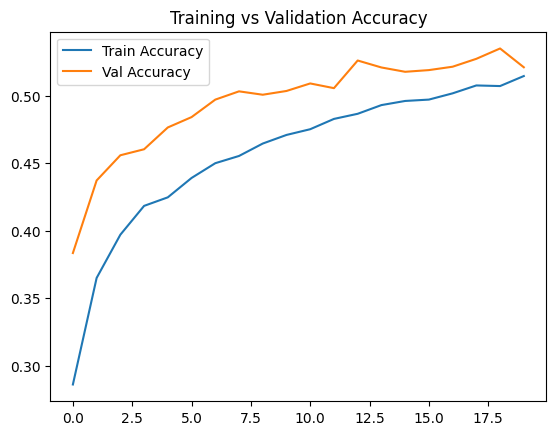

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = 48
BATCH_SIZE = 64
EPOCHS = 20
NUM_CLASSES = 7

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

# Save the model
model.save("fer_emotion_model.h5")
print("✅ Model saved as fer_emotion_model.h5")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')




plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


In [4]:
loss, accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")
print(f"📉 Test Loss: {loss:.4f}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4593 - loss: 1.3336

✅ Test Accuracy: 52.10%
📉 Test Loss: 1.2239


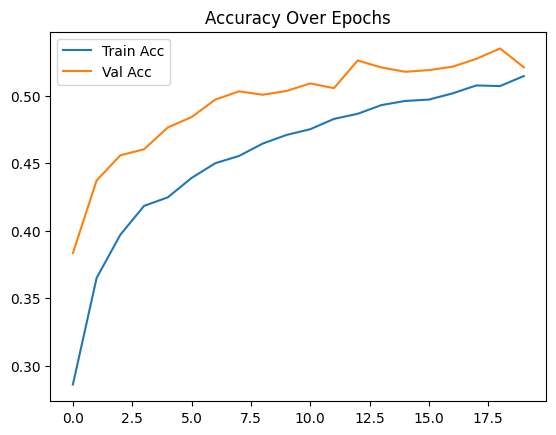

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

In [9]:
"""
real_time_emotion.py
--------------------
Run:  python real_time_emotion.py
Press q to quit.
"""

import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ──────────────────────── 1.  CONFIG ────────────────────────
MODEL_PATH   = "fer_emotion_model.h5"
EMOTIONS     = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # alphabetical order
IMG_SIZE     = 48                               # input size used during training
CONF_THRESH  = 0.50                             # only show prediction if confidence > 50 %

# ──────────────────────── 2.  LOAD MODEL ────────────────────────
model = load_model(MODEL_PATH)

# ──────────────────────── 3.  LOAD FACE DETECTOR ────────────────────────
# Haar-cascade shipped with OpenCV.  Works fine for front‑facing webcam.
cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

# ──────────────────────── 4.  OPEN WEBCAM ────────────────────────
cap = cv2.VideoCapture(0)              # 0 ⇒ default camera; change if you have multiple
if not cap.isOpened():
    raise RuntimeError("Could not open webcam.")

print("[INFO] Press 'q' to exit")

# ──────────────────────── 5.  MAIN LOOP ────────────────────────
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray  = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # ---------- Face ROI ----------
        roi_gray = gray[y:y+h, x:x+w]

        # Resize to model input, normalize to 0‑1 and add batch/chan dims: (1, 48, 48, 1)
        roi = cv2.resize(roi_gray, (IMG_SIZE, IMG_SIZE))
        roi = roi.astype("float32") / 255.0
        roi = np.expand_dims(roi, 0)
        roi = np.expand_dims(roi, -1)

        # ---------- Predict ----------
        preds = model.predict(roi, verbose=0)[0]
        max_index = np.argmax(preds)
        confidence = preds[max_index]

        if confidence >= CONF_THRESH:
            emotion_text = f"{EMOTIONS[max_index]} ({confidence*100:.1f}%)"
        else:
            emotion_text = "unsure"

        # ---------- Draw results ----------
        color = (0, 255, 0) if confidence >= CONF_THRESH else (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        cv2.putText(frame, emotion_text, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2, cv2.LINE_AA)

    # ---------- Display ----------
    cv2.imshow("Real‑Time Emotion Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# ──────────────────────── 6.  CLEANUP ────────────────────────
cap.release()
cv2.destroyAllWindows()


[INFO] Press 'q' to exit
